# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Houman Irani
### Preferred Name (if different): Chosen Name
### Student ID: 014716182
### Email address: houman.irani@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [20]:
np.random.seed(121)

#### Code the solution

In [21]:
table = pd.read_csv("/Users/houmanirani/Downloads/homework4_input_data.csv")
X = table[table.columns[1:-1]]
Y = table[table.columns[-1]]
class_names = ["Leukemia", "Bladder", "Breast", "Colon", "Glioblastoma", "Head&Neck", "Kidney", "LungAdeno", "LungSquamous", "Ovarian", "Rectal", "Uterine", ]
class_names.sort()
X.shape, Y.shape, class_names

((4336, 3000),
 (4336,),
 ['Bladder',
  'Breast',
  'Colon',
  'Glioblastoma',
  'Head&Neck',
  'Kidney',
  'Leukemia',
  'LungAdeno',
  'LungSquamous',
  'Ovarian',
  'Rectal',
  'Uterine'])

In [22]:
table_df = pd.DataFrame(X,columns=table.columns[1:-1])
table_df['class'] = Y
table_df.head()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,class
0,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,0.202624,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,0.449673,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,1.624238,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,0.326149,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,1.658433,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [23]:
table_df.describe()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
count,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,...,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000
mean,6.493217,0.875979,2.547433,2.024070,2.788808,2.838891,2.413940,5.273215,4.531003,6.358596,...,1.347919,4.490551,1.933813,1.628066,2.083775,1.000454,7.176974,6.762318,1.764221,3.516539
std,1.341540,1.322937,1.712000,1.442751,1.385994,1.147753,1.535475,1.570749,1.198838,1.524787,...,1.342945,1.281910,1.314929,1.694187,1.368720,1.282440,1.285927,3.121063,1.190842,1.496502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.197540,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.807468,0.000000,0.000000,0.000000
25%,5.697111,0.000000,1.105780,0.999840,1.810114,2.055747,1.497904,4.215464,3.813267,5.600968,...,0.350634,3.745679,1.122227,0.288757,1.079199,0.000000,6.466050,5.784987,0.875012,2.394757
50%,6.588478,0.279846,2.391468,1.710090,2.679240,2.630627,2.061542,5.211668,4.398703,6.357384,...,0.897331,4.490178,1.567558,0.999664,1.784131,0.428042,7.346725,7.762936,1.421289,3.475282
75%,7.415357,1.159160,3.819411,2.976235,3.748897,3.439166,2.858414,6.405440,5.331706,7.364287,...,2.088001,5.119473,2.091528,2.583887,2.742996,1.499093,8.090525,8.925813,2.575496,4.371683
max,10.753816,6.531445,8.714974,7.458509,7.685174,7.041480,10.548175,10.840692,8.464498,10.031628,...,7.199111,9.034211,7.237835,7.120254,6.901291,5.933580,11.307692,14.115754,6.007571,8.039268


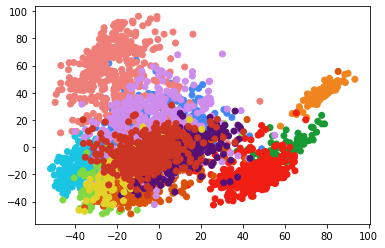

In [24]:
X_reduced = PCA(n_components=5).fit_transform(X)
colors = {"Breast": '#4287f5', "Bladder": '#19c5e3', "Colon": '#80d941', "Glioblastoma": '#179933', "Head&Neck": '#f07e78', "Kidney": '#f01e13', "Leukemia": '#f0841f', "LungAdeno": '#db5209', "LungSquamous": '#ce8ced', "Ovarian": '#551075', "Rectal": '#e3d329', "Uterine": '#cc3423'}
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color=[colors[x] for x in Y])

In [25]:
scale = StandardScaler()
X_rescaled = scale.fit_transform(X_reduced)
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 5), (3468,), (868, 5), (868,))

In [26]:
model = LinearSVC(multi_class='ovr', class_weight='balanced')
cross_val_score(model, X_train, Y_train, cv=5)

array([0.85, 0.84, 0.83, 0.83, 0.81])

In [27]:
model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.83
Accuracy of linear SVC on test set: 0.85


Confusion matrix, without normalization
[[ 61   0   0   0   0   0   0   0   4   1   0   0]
 [  0 163   0   0   9   0   0   1   2   0   0   0]
 [  1   0  71   0   0   0   0   0   0   0   1   1]
 [  0   0   0  23   0   0   0   0   0   0   0   0]
 [  0   1   0   1  78   0   1   0   1   0   0   1]
 [  0   0   0   0   0  80   1   0   1   2   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   1   0  83   1   0   0   0]
 [  5   4   0   0  14   0   0   4  47   4   0   0]
 [  0   5   0   0   0   0   0   0   1  32   0  30]
 [  0   0  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8   0  78]]
Normalized confusion matrix
[[0.92 0.   0.   0.   0.   0.   0.   0.   0.06 0.02 0.   0.  ]
 [0.   0.93 0.   0.   0.05 0.   0.   0.01 0.01 0.   0.   0.  ]
 [0.01 0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.01 0.01]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.01 0.94 0.   0.01 0.   0.01 0.   0.   0.01]
 [0.

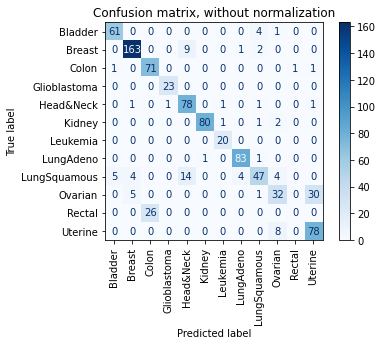

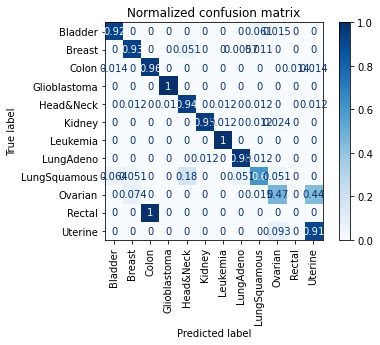

In [28]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation='vertical')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()